In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier

In [2]:
def read_in(feat,label): 
    ##Simple read function
    df_x = pd.read_csv(feat)
    x = df_x.values
    
    df_y = pd.read_csv(label)
    y = df_y.values
    return x,y

def plot_raw_digit(feat): 
    '''Takes a feature vector and plots it as an 8x8 pixel image
    Requires that the vector ranges from 0 to 16'''
    plt.gray()
    plt.matshow(feat.reshape(8,8))
    plt.show()

<Figure size 432x288 with 0 Axes>

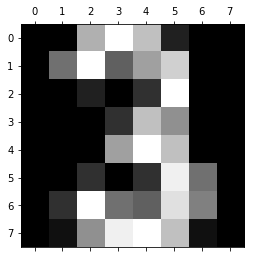

In [3]:
pwd = '/Users/offic/repositories/ml_capstone/gradient_d/data/'
x_train, y_train = read_in(pwd+'Digits_X_train.csv', pwd+'Digits_y_train.csv')
x_test, y_test = read_in(pwd+'Digits_X_test.csv', pwd+'Digits_y_test.csv')
## We don't need to normalize because we don't compare feature to feature in rf

plot_raw_digit(x_train[0]) ##Yep we got the numbers 

In [22]:
##make the random forest
##Check the documentation for options for the classifier
clf = RandomForestClassifier(n_estimators=100, max_features=None,random_state=0)
clf.fit(x_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [10]:
##Now use that fit as a prediction 
y_pred = clf.predict(x_test)

In [9]:
def acc(y_pred,y_true): 
    y_true = y_true.ravel()
    p = np.array(y_pred == y_true, dtype = int)
    return np.sum(p)/float(len(y_true))

In [26]:
print(acc(y_pred,y_test))

0.9555555555555556


In [4]:
## Optimise 
    ## using a k-fold cross validation
    ## Consider using OOB error as a maximizer 
    
targ_est = [100,200,300]
for n in targ_est: 
    classifier = RandomForestClassifier(n_estimators=n, max_features=None,oob_score=True,random_state=0)
    classifier.fit(x_train,y_train.ravel())
    print('Estimators=',n,'OOB_Score=',classifier.oob_score_)

Estimators= 100 OOB_Score= 0.9465478841870824
Estimators= 200 OOB_Score= 0.949517446176689
Estimators= 300 OOB_Score= 0.947290274684484


In [7]:
## Now for the best n features 
max_feat = ['auto','sqrt','log2']
for m in max_feat: 
    classifier = RandomForestClassifier(n_estimators=200, max_features=m,oob_score=True,random_state=0)
    classifier.fit(x_train,y_train.ravel())
    print('Max Features =',m,'OOB_Score =',classifier.oob_score_)

Max Features = auto OOB_Score = 0.977728285077951
Max Features = sqrt OOB_Score = 0.977728285077951
Max Features = log2 OOB_Score = 0.9710467706013363


In [10]:
## Retrain with opt parameters 
clf = RandomForestClassifier(n_estimators=200, max_features='sqrt',random_state=0)
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test)

print(acc(y_pred,y_test))

0.9777777777777777
